#### 读取文件所在路径

In [62]:
import os 
path1="C:\\Users\\54758\\Documents\\学者收集\\"  ###改成你自己的path
path2="C:\\Users\\54758\\Documents\\学者收集合并\\"

#### 示例数据： 一个是wos导出一个是知网导出，知网导出那个需要进行数据清洗，这里用的正则提取
##### 把数据做成下面这个图这样，以名字命名

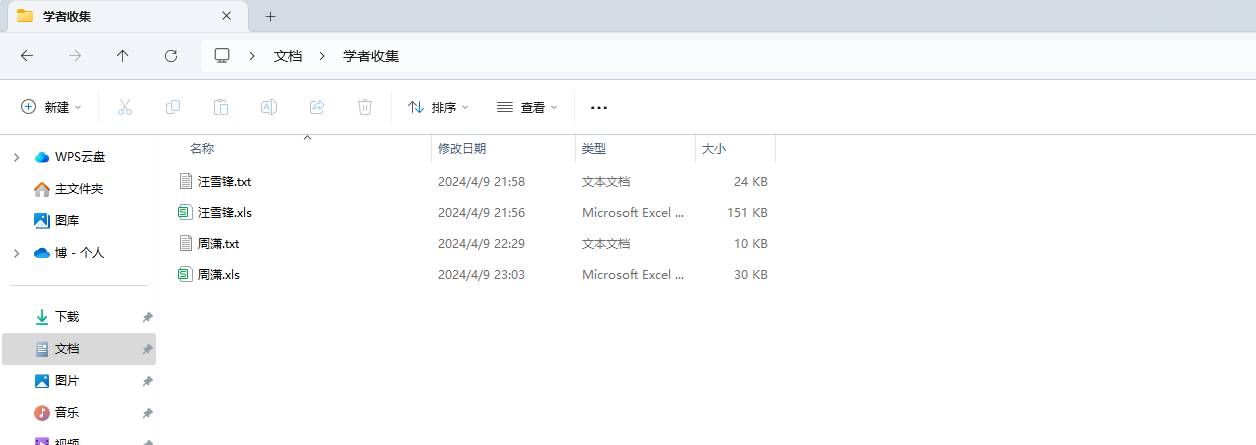

In [46]:
from IPython.display import Image
Image(filename=r"A:\新下载\1712675386966.png",width=1000,height=1000)

In [63]:
files = os.listdir(path1)

In [64]:
files

['周潇.txt',
 '周潇.xls',
 '李纲.txt',
 '李纲.xls',
 '汪雪锋.txt',
 '汪雪锋.xls',
 '魏一鸣.txt',
 '魏一鸣.xls']

In [59]:
#读取txt和xls，下面的代码只是测试

In [10]:
import pandas as pd
import re
a=open("test.txt","r",encoding="utf-8")
data_list=a.readlines()
import pandas as pd
records = []

for i in range(0, len(data_list), 2):  
    # 提取作者和题目
    info_spilt = data_list[i].split(".")
    print(info_spilt)
    author_title_part = info_spilt[0]
    authors = author_title_part[author_title_part.find(']')+1:]  
    title = data_list[i].split(".")[1]
    if "导师：" in info_spilt[2]:
        tutor = info_spilt[2][3:]
        
    else:
        tutor = "None"
    print(tutor)

    # 使用正则表达式适配不同的期刊标识符
    journal_info_match = re.search(r'\[(J|N|C)\].*?\n', data_list[i])
    if journal_info_match:
        journal_info = journal_info_match.group(0).split("]")[1].strip()
    else:
        journal_info = "未知"  # 如果没有找到匹配的标识符，可以设为"未知"或者其他默认值

    abstract = data_list[i+1].split("摘要:")[1].strip() 
    record = {
        '作者': authors,
        '题目': title,
        '期刊': journal_info,
        '摘要': abstract,
        '导师': tutor
    }
    records.append(record)

print(records)

# df = pd.DataFrame(records)

# new_df = df.rename(columns={
#     '作者': 'Authors',
#     '题目': 'Article Title',
#     '期刊': 'Source Title',
#     '摘要': 'Abstract'
# })
# df2=pd.read_excel(path1+"汪雪锋.xls")
# combined_df = pd.concat([df2,new_df], ignore_index=True)
# combined_df.to_excel(path2+"汪雪锋.xlsx", index=False)


['[1]彭楚', '室内灰尘中微塑料的分布特征及“塑料域”的群落结构与健康风险[D]', '导师：汪磊', '南开大学,2022', '\n']
汪磊
['[2]张颖', '垃圾填埋场中典型微塑料的分布特征与老化行为研究[D]', '导师：汪磊', '南开大学,2022', '\n']
汪磊
['[3]张俊杰,董鹏越,张颖,田宇杰,刘春光,孙红文,汪磊', '以PET聚合物为例定量评估微塑料的非主动陆地输入[J]', '科学通报,2021,66(13):1563-1570', '\n']
None
['[4]刘玉斌,张艺蕾,李科,吴颖虹,汪磊', '日常衣物中的邻苯二甲酸酯污染及其人体暴露风险[J]', '生态毒理学报,2020,15(01):186-192', '\n']
None
['[5]张晓菲,汪磊', '环境中纳米塑料的分离与检测[J]', '环境化学,2020,39(01):8-11', '\n']
None
['[6]王婷,刘金鹏,王平,汪磊,孙红文,展思辉', '环境监测实验的实践教学育人探索[J]', '实验室科学,2019,22(06):206-208', '\n']
None
['[7]王婷,汪磊,王恺,孔德领,卢媛,展思辉,孙红文', '环境学与生命科学学科交叉融合对人才培养的思考[J]', '实验室科学,2019,22(06):217-218+222', '\n']
None
[{'作者': '彭楚', '题目': '室内灰尘中微塑料的分布特征及“塑料域”的群落结构与健康风险[D]', '期刊': '未知', '摘要': '由于合成纤维织物和塑料制品在室内环境中的高频率使用,微塑料在室内灰尘中广泛存在。但尽管包括本课题组在内的研究团队已经揭示了聚对苯二甲酸乙二醇酯(PET)聚合物在灰尘中的浓度水平,但对室内灰尘中微塑料的种类、浓度及数量丰度,特别是其与纤维素等天然成分的丰度差异,目前仍不清楚。合成纤维是室内微塑料的重要来源,但除PET外,其他合成纤维的定量方法仍然缺失。在水体和土壤环境中,塑料表面可以为微生物提供一个独特的生境,使特定微生物选择性地在其表面定殖形成生物膜,这被称为“塑料域(plastisphere)”,也有研究将其翻译为塑料圈。水体及土壤环境中的塑料域被认为能富集抗生素耐药基因(ARGs),以及一些潜在病原菌。对于室内环境

In [51]:
# import re
# records = []
# import re
# for i in range(0, len(data_list) - 1, 2):
#     try:
#         # 提取作者和题目
#         author_title_part = data_list[i].split(".")[0]
#         authors = author_title_part[author_title_part.find(']')+1:]
#         title = data_list[i].split(".")[1]

#         # 适配期刊标识符
#         journal_info_match = re.search(r'\[(J|N|C)\].*?\n?', data_list[i])
#         if journal_info_match:
#             journal_info = journal_info_match.group(0).split("]")[1].strip()
#         else:
#             journal_info = "未知"

#         # 检查是否存在下一项，并且下一项是否包含摘要
#         if i+1 < len(data_list) and "摘要:" in data_list[i+1]:
#             abstract = data_list[i+1].split("摘要:")[1].strip()
#         else:
#             abstract = "摘要:xxx"  # 如果没有摘要，则设置默认值

#         record = {
#             '作者': authors,
#             '题目': title,
#             '期刊': journal_info,
#             '摘要': abstract
#         }
#         records.append(record)
#     except Exception as e:
#         print(f"在处理 data_list[{i}] 时发生了未知错误：{str(e)}")




'魏一鸣,王恺'

In [65]:
import pandas as pd 

#封装代码并测试

In [66]:
import pandas as pd
import os
import re
def chuli(filenames, path1, path2):
    file_groups = {}
    for filename in filenames:
        prefix = filename.split('.')[0]
        if prefix not in file_groups:
            file_groups[prefix] = []
        file_groups[prefix].append(filename)
    for prefix, files in file_groups.items():
        if len(files) == 2 and any(f.endswith('.txt') for f in files) and any(f.endswith('.xls') for f in files):
            txt_file = [f for f in files if f.endswith('.txt')][0]
            xls_file = [f for f in files if f.endswith('.xls')][0]
            txt_file_path = os.path.join(path1, txt_file)
            try:
                with open(txt_file_path, "r", encoding="utf-8") as a:
                    data_list = a.readlines()
            except Exception as e:
                print(f"无法读取文件 {txt_file_path}: {e}")
                continue
            records = []
            for i in range(0, len(data_list) - 1, 2):
                try:
                    author_title_part = data_list[i].split(".")[0]
                    authors = author_title_part[author_title_part.find(']')+1:]
                    title = data_list[i].split(".")[1]
                    
                    journal_info_match = re.search(r'\[(J|N|C|A)\](.*?)(?=\n)', data_list[i])#这样期刊[j],[c][N][a]均能被读取并处理了
                    journal_info = journal_info_match.group(2).strip() if journal_info_match else "未知"

                    if i+1 < len(data_list):
                        abstract_part = data_list[i+1].split("摘要:")
                        abstract = abstract_part[1].strip() if len(abstract_part) > 1 else "摘要：xxxx"#没摘要的时候就是xxx代替
                        record = {
                            'Authors': authors,
                            'Article Title': title,
                            'Source Title': journal_info,
                            'Abstract': abstract
                        }
                        records.append(record)
                except IndexError as e:
                    print(f"错误出现在文件 {txt_file} 行 {i}: {e}")#报错，方便追查哪个文件出错，一般来说，把出错的行直接当缺失数据删除是最好的处理方法
                except Exception as e:
                    print(f"处理文件 {txt_file} 时发生未知错误: {e}")

            # 创建 DataFrame 并与 Excel 文件合并
            df = pd.DataFrame(records)
            try:
                df2 = pd.read_excel(os.path.join(path1, xls_file))
            except Exception as e:
                print(f"无法读取Excel文件 {xls_file}: {e}")
                continue
            combined_df = pd.concat([df2, df], ignore_index=True)
            output_path = os.path.join(path2, prefix + ".xlsx")
            try:
                combined_df.to_excel(output_path, index=False)
            except Exception as e:
                print(f"无法写入Excel文件 {output_path}: {e}")

chuli(files,path1,path2)